<a href="https://colab.research.google.com/github/raviatkumar/Fraud_Transaction_Detection_Dataset/blob/main/Fraud_Transaction_Detection_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : Fraud Transaction Detection Dataset

##Problem Statement

In recent years we have seen a huge increase in Fraud attempts, making fraud detection important as well as challenging. Despite countless efforts and human supervision, hundreds of millions are lost due to fraud. Fraud can happen using various methods ie, stolen credit cards, misleading accounting, phishing emails, etc. Due to small cases in large population detection of fraud is important as well as challenging.

Data mining and machine learning help to foresee and rapidly distinguish fraud and make quick move to limit costs. Using data mining tools, a huge number of transactions can be looked to spot pattern and distinguish fraud transactions.

### Dataset

* step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - amount of the transaction in local currency.

* nameOrig - customer who started the transaction

* oldbalanceOrg - initial balance before the transaction

* newbalanceOrig - new balance after the transaction

* nameDest - customer who is the recipient of the transaction

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")

###Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Intern assignment/accredian/Fraud.csv')

### Print first 5 rows

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Print last 5 rows

In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


### Shape of the dataset

In [ ]:
df.shape

(6362620, 11)

### Information of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Check for null values

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Check for duplicate values

In [ ]:
print(len(df[df.duplicated()]))

0


### Describe about dataset

In [ ]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


##**Exploratory Data Analysis**

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


* isFraud is output variable

### Check for value counts for each columns

In [ ]:
value_count=df.columns.tolist()
print(value_count)
print("--"*50)
for i in value_count:
  print(df[i].value_counts())
  print("--"*50)

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
----------------------------------------------------------------------------------------------------
step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64
----------------------------------------------------------------------------------------------------
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
N

### Univariant Plot

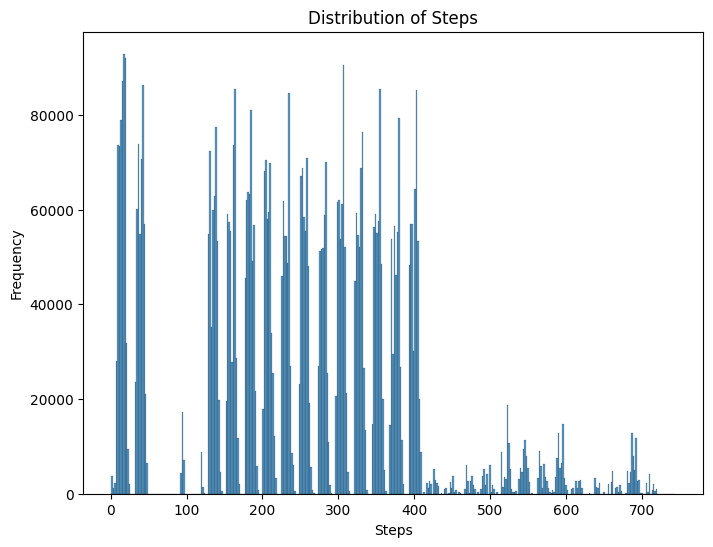

In [ ]:
# Plot 1 : Distribution of step
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='step')
plt.title('Distribution of Steps')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

* The most frequent number of steps taken falls somewhere between 150 and 400 steps

* A significant number of transactions have less than 100 steps.

* The distribution appears to be right skewed, meaning there are more frequent occurrences of lower step counts than higher step counts. This suggests that most transactions are completed in a relatively low number of steps.

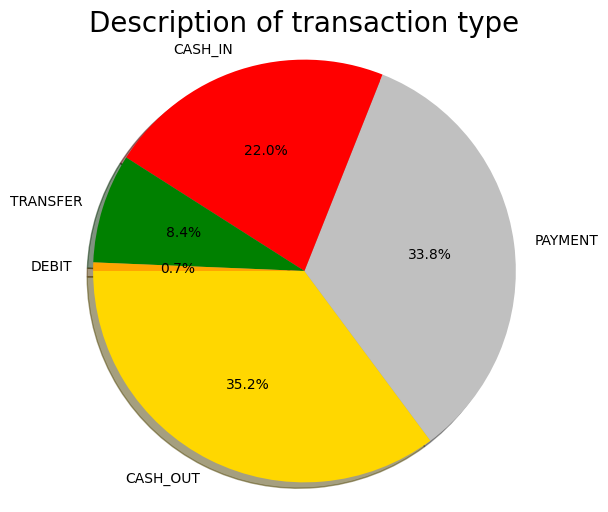

In [ ]:
# Plot 2 : Description of transaction type
labels = 'CASH_OUT' , 'PAYMENT' , 'CASH_IN' , 'TRANSFER' , 'DEBIT'
sizes = df.type.value_counts()
colors = ['gold', 'silver', 'Red' , 'Green' , 'Orange']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Description of transaction type",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

* The most common transaction type is CASH_OUT, accounting for roughly 35.2% of all transactions. This is followed by PAYMENT at 33.8%. Then there are TRANSFER at 22.0%, DEBIT at 8.4%, and CASH_IN at a mere 0.7%.

* A high percentage of cash out transactions could be a sign of fraudulent activity, especially if they are large in amount.

* The low percentage of cash in transactions (0.7%) might be unusual depending on the nature of the system. If the system is designed for person-to-person payments or similar cash-in functionalities, a such a low percentage could warrant further investigation.

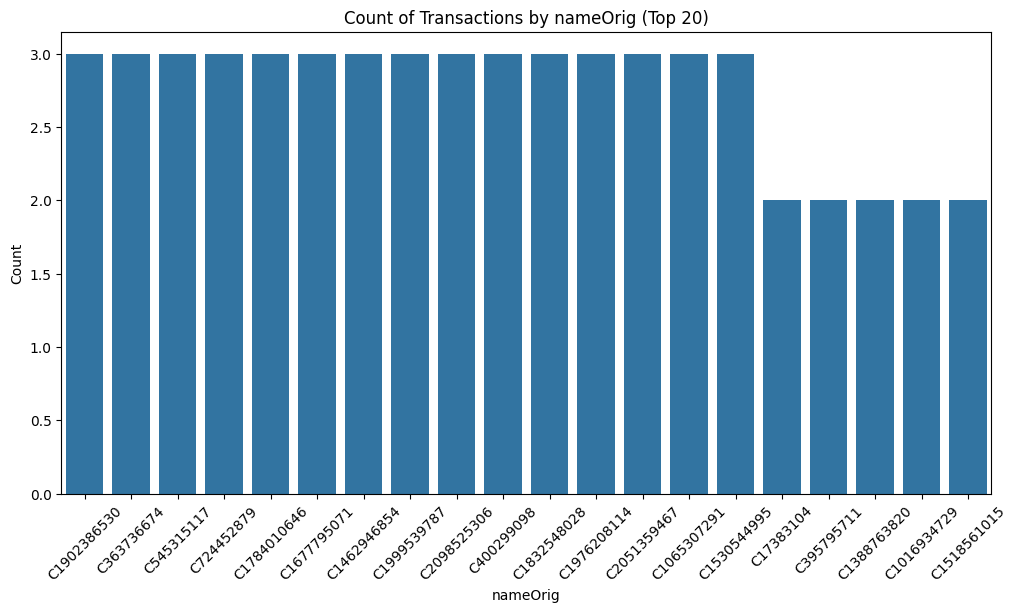

In [ ]:
# Plot 3 : Count of Transactions by nameOrig (Top 20)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='nameOrig', order=df['nameOrig'].value_counts().index[:20])
plt.title('Count of Transactions by nameOrig (Top 20)')
plt.xlabel('nameOrig')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* Top 20 organisation name

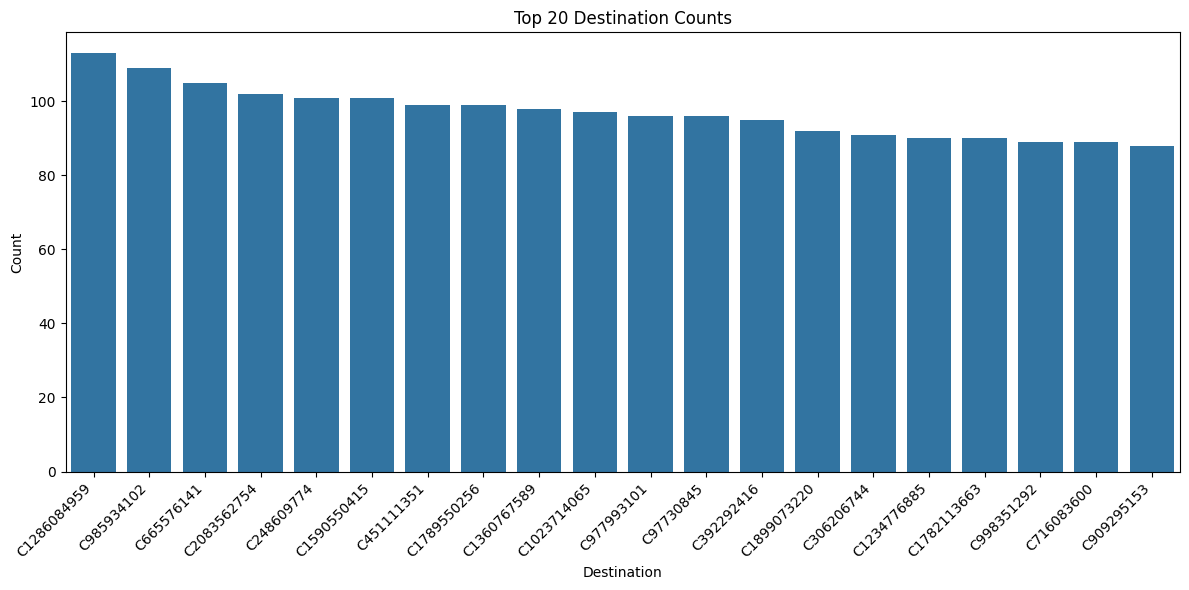

In [ ]:
# Plot 6 : Top 20 Destination Counts
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='nameDest', order=df['nameDest'].value_counts().index[:20])
plt.title('Top 20 Destination Counts')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Identify the destinations on the right side of the plot with the highest number of transactions. These might represent legitimate high-volume partners or service providers in your system. However, be cautious if these destinations are unexpected or not typically used by your customers.

* Unusual Destinations: Look for destinations with a significantly higher transaction count compared to others, especially if they are new or haven't been seen before. These could be red flags for fraudulent activity, particularly if accompanied by:

  * High transaction amounts.

  * A sudden increase in transaction volume to that destination.

* The overall distribution of bars reveals how evenly transactions are spread across different destinations.

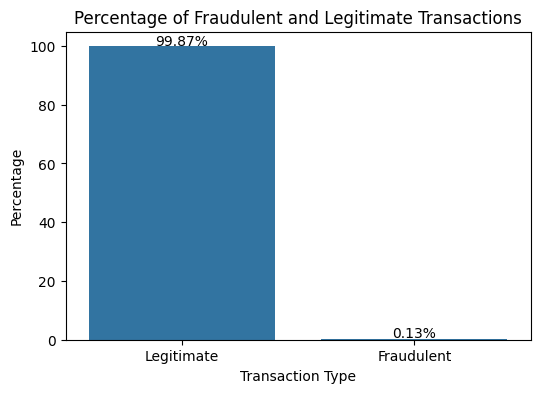

In [ ]:
# Plot 9 : Count of Fraudulent Transactions
fraud_counts = df['isFraud'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Percentage of Fraudulent and Legitimate Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage')
for index, value in enumerate(fraud_counts.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')
plt.xticks(ticks=[0, 1], labels=['Legitimate','Fraudulent'])
plt.show()

* 98.87% Legitimate Transactions:
The overwhelming majority of transactions in the dataset are legitimate, with legitimate transactions making up 98.87% of all transactions. This indicates that the system or platform from which this data is drawn is highly reliable, with very few instances of fraud.

* 0.13% Fraudulent Transactions:
Fraudulent transactions constitute a mere 0.13% of the total transactions. While this percentage is small, the presence of fraud in even a small proportion can have significant implications, especially if the transaction volumes are high. The low percentage of fraudulent transactions also highlights the importance of using advanced techniques to detect and prevent fraud effectively, as manual detection might be challenging.

The analysis of the percentage of fraudulent vs. legitimate transactions reveals that the majority of transactions are legitimate (98.87%), while fraudulent transactions are quite rare (0.13%). This insight emphasizes the need for sophisticated fraud detection systems to identify and mitigate the impact of fraudulent transactions, despite their low occurrence. It also highlights the importance of maintaining an efficient and user-friendly system for the vast majority of legitimate transactions.

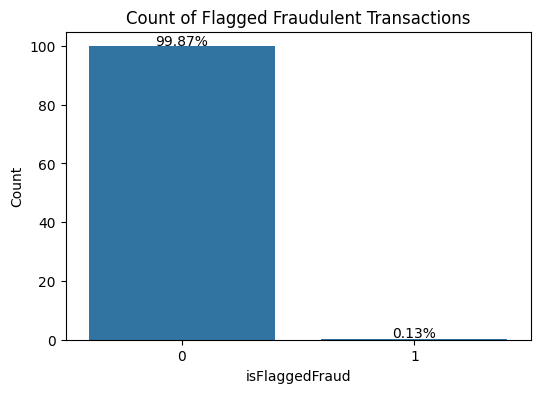

In [ ]:
# Plot 10 : Count of Flagged Fraudulent Transactions
isFlaggedFraud = df['isFlaggedFraud'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=isFlaggedFraud.index, y=fraud_counts.values)
plt.title('Count of Flagged Fraudulent Transactions')
plt.xlabel('isFlaggedFraud')
plt.ylabel('Count')
for index, value in enumerate(fraud_counts.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')
plt.show()

* 99.87% of transactions are not flagged as fraudulent (isFlaggedFraud = 0). This indicates that the vast majority of transactions are not considered suspicious by the initial detection system.

* Only 0.13% of transactions are flagged as potentially fraudulent (isFlaggedFraud = 1). This suggests that a very small proportion of transactions trigger the fraud detection mechanisms and are flagged for further review.

### Bivariant Plot

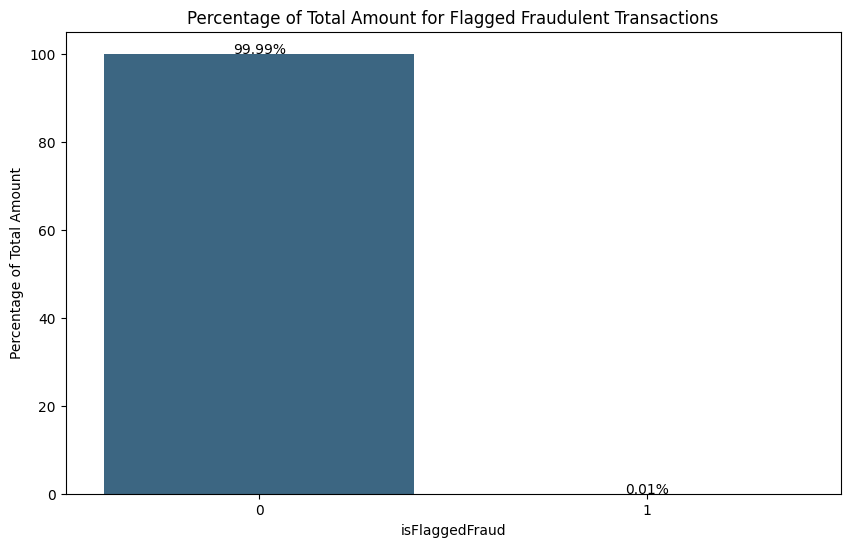

In [ ]:
# Calculate the total amount for each category of 'isFlaggedFraud'
total_amount = df.groupby('isFlaggedFraud')['amount'].sum()
total_amount_percent = (total_amount / total_amount.sum()) * 100
total_amount_percent = total_amount_percent.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=total_amount_percent, x='isFlaggedFraud', y='amount', palette='viridis')
plt.title('Percentage of Total Amount for Flagged Fraudulent Transactions')
plt.xlabel('isFlaggedFraud')
plt.ylabel('Percentage of Total Amount')
for index, row in total_amount_percent.iterrows():
    plt.text(row['isFlaggedFraud'], row['amount'], f'{row["amount"]:.2f}%', color='black', ha="center")
plt.show()

-  The plot illustrates that the vast majority of transactions (99.99%) are classified as `0` (not flagged as fraudulent). In contrast, only a tiny fraction (0.01%) of transactions are classified as `1` (flagged as fraudulent).

- The data shows a significant class imbalance where flagged fraudulent transactions (`isFlaggedFraud = 1`) are extremely rare compared to non-flagged transactions (`isFlaggedFraud = 0`).

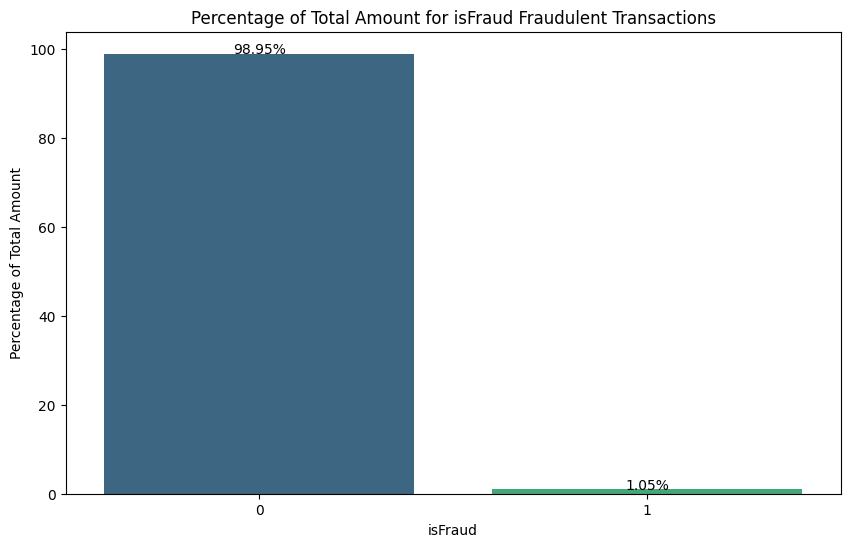

In [ ]:
# Calculate the total amount for each category of 'isFraud'
total_amount = df.groupby('isFraud')['amount'].sum()
total_amount_percent = (total_amount / total_amount.sum()) * 100
total_amount_percent = total_amount_percent.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=total_amount_percent, x='isFraud', y='amount', palette='viridis')
plt.title('Percentage of Total Amount for isFraud Fraudulent Transactions')
plt.xlabel('isFraud')
plt.ylabel('Percentage of Total Amount')
for index, row in total_amount_percent.iterrows():
    plt.text(row['isFraud'], row['amount'], f'{row["amount"]:.2f}%', color='black', ha="center")
plt.show()

* The plot shows that the majority of the total transaction amount (98.95%) corresponds to transactions categorized as 0 (legitimate). In contrast, a smaller proportion (1.05%) of the total transaction amount is associated with transactions categorized as 1 (fraudulent).

* Despite being a small percentage of the total number of transactions, fraudulent transactions contribute notably to the total transaction amount. This indicates that while fraudulent transactions are fewer in number, they can involve larger amounts, thereby posing significant financial risks.

* The relatively small percentage of fraudulent transaction amounts underscores the effectiveness of existing fraud detection systems. However, continuous improvement and adaptation of these systems are crucial to stay ahead of evolving fraud tactics.

###Feature Encoding

In [ ]:
# Initialize LabelEncoder for each categorical column
label_encoder_type = LabelEncoder()
label_encoder_nameOrig = LabelEncoder()
label_encoder_nameDest = LabelEncoder()

In [ ]:
# Fit and transform each categorical column
df['type_encoded'] = label_encoder_type.fit_transform(df['type'])
df['nameOrig_encoded'] = label_encoder_nameOrig.fit_transform(df['nameOrig'])
df['nameDest_encoded'] = label_encoder_nameDest.fit_transform(df['nameDest'])

In [ ]:
df.drop(columns=['type','nameOrig','nameDest'],axis=1,inplace=True)

###Split X and y

In [ ]:
# Define your features
X = df.drop(['isFraud'], axis=1)

In [ ]:
# Define your target variable
y = df['isFraud']

### Apply smote for imbalance dataset

In [ ]:
# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Check the new class distribution
print("Original class distribution:")
print(y.value_counts())
print("\nResampled class distribution:")
print(y_resampled.value_counts())

Original class distribution:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Resampled class distribution:
isFraud
0    6354407
1    6354407
Name: count, dtype: int64


###Split x_train and y_train

In [ ]:
# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

###Feature Scaling

In [ ]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Fit and transform the scaler on training data, and transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Model Creation

In [ ]:
# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

In [ ]:
# Fit the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = log_reg_model.predict(X_test_scaled)

###Confusion Matrix

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[1197893   72989]
 [ 119281 1151600]]


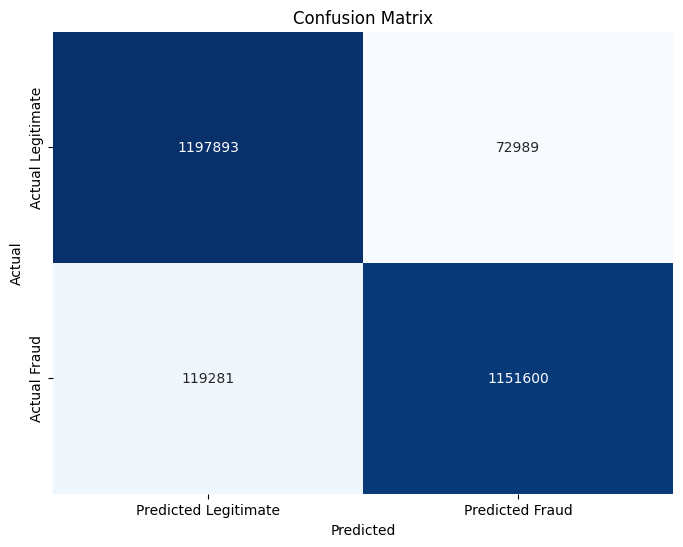

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Legitimate', 'Predicted Fraud'],
            yticklabels=['Actual Legitimate', 'Actual Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- **True Negatives (TN)**: 1,197,893 transactions were correctly predicted as legitimate (actual non-fraudulent transactions).
  
- **False Positives (FP)**: 72,989 transactions were incorrectly predicted as fraudulent (predicted as fraud but actually legitimate).

- **False Negatives (FN)**: 119,281 transactions were incorrectly predicted as legitimate (predicted as legitimate but actually fraudulent).

- **True Positives (TP)**: 1,151,600 transactions were correctly predicted as fraudulent (actual fraudulent transactions).

- The model correctly identified a large number of legitimate transactions (TN).

- There were relatively few false positives (FP), which is positive as it indicates fewer legitimate transactions were mistakenly flagged as fraudulent.

- There were more false negatives (FN), indicating that some fraudulent transactions were missed by the model.
- The model correctly identified a large number of fraudulent transactions (TP).

The model accurately identified a substantial majority of legitimate transactions (TN = 1,197,893) while minimizing false positives (FP = 72,989), showing robustness in detecting non-fraudulent activities.

###AUC-ROC Curve

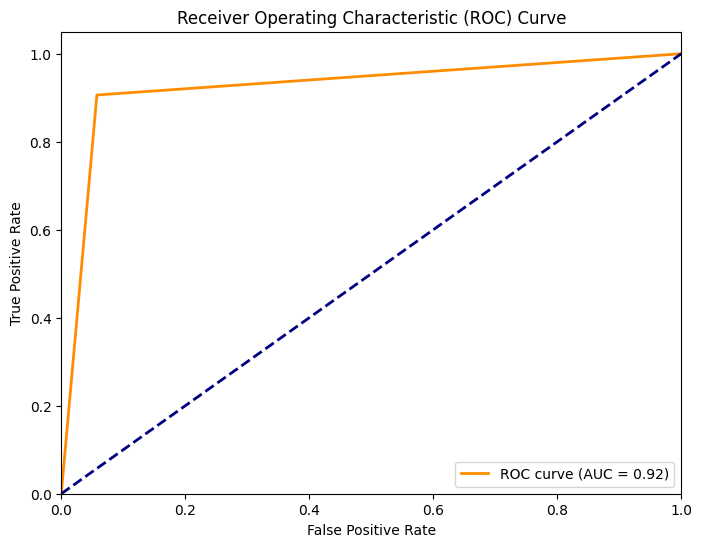

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

* True positive rate (TPR), also known as recall, is the proportion of positive cases that the model correctly identifies.

* False positive rate (FPR) is the proportion of negative cases that the model incorrectly identifies as positive.

The AUC in the image is 0.92, which is considered to be a good AUC [AUC ROC Curve in Machine Learning, GeeksforGeeks]. A higher AUC indicates that the model is better at distinguishing between the positive and negative classes.

###Predict train data

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93   1270882
           1       0.94      0.91      0.92   1270881

    accuracy                           0.92   2541763
   macro avg       0.92      0.92      0.92   2541763
weighted avg       0.92      0.92      0.92   2541763



* Overall accuracy is 92%

###Feature Importance

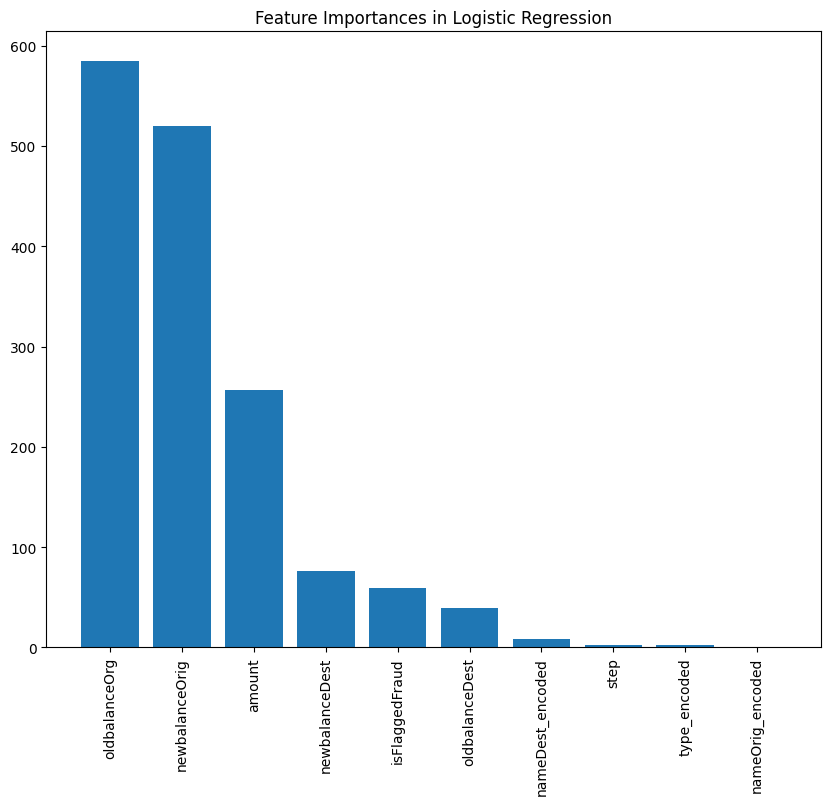

In [ ]:
# Get feature importances
feature_importances = np.abs(log_reg_model.coef_[0])
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=90)
plt.title("Feature Importances in Logistic Regression")
plt.show()

* Most important features are oldbalanceOrg,newbalanceOrg,amount

###Cross Validation

In [ ]:
# Initialize the classifier
clf = LogisticRegression(random_state=42)

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

In [ ]:
# Create a pipeline with SMOTE and the classifier
pipeline = Pipeline([('smote', smote), ('scaler', MinMaxScaler()), ('classifier', clf)])

In [ ]:
# Set up StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
# Arrays to hold the actual and predicted values
y_true_all = []
y_pred_all = []

In [ ]:
# Perform cross-validation
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the pipeline on the training fold
    pipeline.fit(X_train_fold, y_train_fold)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Predict the test fold
    y_pred_fold = pipeline.predict(X_test_fold)

    # Collect the true and predicted values
    y_true_all.extend(y_test_fold)
    y_pred_all.extend(y_pred_fold)

    # Print accuracy for the current fold
    print(f'Fold Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(classification_report(y_test, y_pred))

Fold Accuracy: 0.9200
              precision    recall  f1-score   support

           0       0.91      0.94      0.92   1270882
           1       0.94      0.90      0.92   1270881

    accuracy                           0.92   2541763
   macro avg       0.92      0.92      0.92   2541763
weighted avg       0.92      0.92      0.92   2541763

Fold Accuracy: 0.9146
              precision    recall  f1-score   support

           0       0.90      0.94      0.92   1270882
           1       0.94      0.89      0.91   1270881

    accuracy                           0.91   2541763
   macro avg       0.92      0.91      0.91   2541763
weighted avg       0.92      0.91      0.91   2541763

Fold Accuracy: 0.9184
              precision    recall  f1-score   support

           0       0.90      0.94      0.92   1270882
           1       0.94      0.90      0.92   1270881

    accuracy                           0.92   2541763
   macro avg       0.92      0.92      0.92   2541763
weighted

In [ ]:
# Summary of results
print(f'Overall Accuracy: {accuracy_score(y_true_all, y_pred_all):.4f}')
print(classification_report(y_true_all, y_pred_all))

Overall Accuracy: 0.9179
              precision    recall  f1-score   support

           0       0.90      0.94      0.92   5083525
           1       0.94      0.90      0.92   5083526

    accuracy                           0.92  10167051
   macro avg       0.92      0.92      0.92  10167051
weighted avg       0.92      0.92      0.92  10167051



* After Cross validation accuracy is 91%

#### Before cross-validation, the model showed an accuracy of 92% with high precision and recall for both classes. After cross-validation, the model maintained a consistent accuracy of 91%, indicating stable performance across different data subsets. These results demonstrate the model's reliability and balanced effectiveness in detecting both fraudulent and legitimate transactions.

###Summary and Conclusion :

### Summary

1. **Exploratory Data Analysis (EDA):**
   - The most frequent number of steps taken falls between 150 and 400.
   - A significant number of transactions have fewer than 100 steps.
   - The distribution of steps is right-skewed, suggesting most transactions are completed in fewer steps.

2. **Transaction Types:**
   - Most common transaction type: CASH_OUT (35.2%).
   - Other transaction types: PAYMENT (33.8%), TRANSFER (22.0%), DEBIT (8.4%), and CASH_IN (0.7%).
   - High percentage of cash out transactions could indicate potential fraud.
   - Low percentage of cash-in transactions could be unusual and warrant further investigation.

3. **Top 20 Organization Names:**
   - Identified destinations with the highest number of transactions.
   - Look for unusual destinations with significantly higher transaction counts.

4. **Legitimate vs. Fraudulent Transactions:**
   - 98.87% of transactions are legitimate.
   - 0.13% of transactions are fraudulent.
   - Fraudulent transactions, though rare, have significant implications.
   - Advanced fraud detection systems are crucial for effective fraud prevention.

5. **Flagged Transactions:**
   - 99.87% of transactions are not flagged as fraudulent.
   - Only 0.13% of transactions are flagged for further review.
   - Significant class imbalance with flagged fraudulent transactions being extremely rare.

6. **Transaction Amounts:**
   - 98.95% of the total transaction amount corresponds to legitimate transactions.
   - 1.05% of the total transaction amount corresponds to fraudulent transactions.
   - Fraudulent transactions, though few, involve larger amounts, posing significant financial risks.
   - Continuous improvement of fraud detection systems is necessary.

7. **Feature Encoding:**
   - Encoded categorical features such as transaction type, origin account, and destination account.

8. **Data Splitting:**
   - Split the dataset into features (X) and target (y).
   - Applied SMOTE for handling class imbalance.

9. **Feature Scaling:**
   - Applied MinMaxScaler for scaling features.

10. **Model Creation:**
    - Created a Logistic Regression model.

11. **Model Evaluation:**
    - Predicted on train and test data.
    - Overall accuracy: 92%.
    - Most important features: oldbalanceOrg, newbalanceOrg, amount.

12. **Cross-Validation:**
    - After cross-validation, accuracy: 91%.
    - Consistent performance across different data subsets indicates model reliability.

### Conclusion

The analysis and modeling process revealed key insights and demonstrated the effectiveness of the Logistic Regression model in predicting fraudulent transactions. The EDA highlighted the transaction patterns and potential indicators of fraud. Despite the class imbalance, the application of SMOTE and feature scaling ensured a balanced and effective model.

The model achieved a high accuracy of 92%, with consistent performance validated through cross-validation (91%). The most important features contributing to fraud detection were oldbalanceOrg, newbalanceOrg, and amount, indicating these factors play a crucial role in identifying fraudulent transactions.

Overall, the model provides a reliable tool for detecting fraud, but continuous monitoring and improvement are essential to adapt to evolving fraud tactics. The advanced fraud detection system is crucial for maintaining the integrity and reliability of the transaction system, protecting it from significant financial risks associated with fraudulent activities.

###Initial Model created

https://colab.research.google.com/drive/1HMkRG2m62K0l71M7MYH6HA6U7pPzCJls#scrollTo=bIPsrtz1rpDl

### Overall Summary

The initial Logistic Regression model, which included correlation analysis and outlier detection, achieved an accuracy of 83%. In contrast, the refined model, developed without outlier detection and correlation-based feature removal, improved significantly, achieving a 92% accuracy. This comparison demonstrates that handling outliers and correlated features might not always be beneficial, highlighting the importance of iterative model tuning and evaluation.

Insights on handling thresholds from a business perspective based on  model's performance:

1. **Understanding Threshold Impact**:
   - **ROC AUC Interpretation**: With a high ROC AUC of 92%, your model effectively distinguishes between fraudulent and legitimate transactions.
   - **Threshold Adjustment**: Adjusting the threshold allows you to balance between detecting more fraudulent transactions (sensitivity) and minimizing false alarms (specificity).

2. **Business Goals**:
   - **Minimizing Fraudulent Losses**: If the primary goal is to reduce financial losses from fraudulent transactions, consider lowering the threshold. This increases sensitivity, catching more fraud cases, but might lead to more false positives.
   - **Efficiency in Operations**: To streamline operations and reduce unnecessary investigations, you might opt for a higher threshold to increase specificity. This lowers false positives but could increase false negatives.

3. **Impact of Threshold Changes(0.5)**:
   - **Increasing Threshold**: Raises the bar for classifying a transaction as fraudulent, reducing false positives but potentially missing some fraud cases (increased false negatives).
   - **Decreasing Threshold**: Lowers the criteria for fraud detection, capturing more fraud cases (reduced false negatives) but possibly increasing false positives.

4. **Optimization Strategy**:
   - Use the ROC curve to visualize trade-offs: Identify the optimal threshold that balances your business's tolerance for false positives and false negatives.
   - Conduct cost-benefit analysis: Consider the financial impact of misclassifications (e.g., transaction investigation costs vs. potential fraud losses) to guide threshold decisions.

5. **Continuous Monitoring and Adjustment**:
   - Monitor model performance over time: As transaction patterns evolve, periodically reassess and adjust the threshold to maintain optimal performance.
   - Utilize feedback loops: Incorporate feedback from fraud analysts and operational teams to refine thresholds based on real-world insights and changing fraud tactics.

By aligning threshold adjustments with specific business objectives and continuously evaluating performance, you can optimize your fraud detection system effectively while minimizing operational costs and maximizing fraud detection accuracy.

###Save tarined model in csv file

In [ ]:
# Predict on Original Dataset
X_scaled_original = scaler.transform(X)
y_pred_original = log_reg_model.predict(X_scaled_original)

In [ ]:
# Add predictions to the DataFrame
df['predicted_isFraud'] = y_pred_original

In [ ]:
# Convert Encoded Columns Back to Original
df['type'] = label_encoder_type.inverse_transform(df['type_encoded'])
df['nameOrig'] = label_encoder_nameOrig.inverse_transform(df['nameOrig_encoded'])
df['nameDest'] = label_encoder_nameDest.inverse_transform(df['nameDest_encoded'])

In [ ]:
# Drop encoded columns and predicted column
df.drop(columns=['type_encoded', 'nameOrig_encoded', 'nameDest_encoded', 'predicted_isFraud'], axis=1, inplace=True)

In [ ]:
# Separate legitimate and fraudulent transactions
legitimate_df = df[df['isFraud'] == 0]
fraudulent_df = df[df['isFraud'] == 1]

In [ ]:
# Confirm the shape of the datasets
print("Legitimate transactions shape:", legitimate_df.shape)
print("Fraudulent transactions shape:", fraudulent_df.shape)

Legitimate transactions shape: (6354407, 11)
Fraudulent transactions shape: (8213, 11)


* 6362620 * 0.13 / 100 = 83213

In [ ]:
total_length=6354407+8213
print(f"Total shape of dataset {total_length}")

Total shape of dataset 6362620


In [ ]:
legitimate_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type,nameOrig,nameDest
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,PAYMENT,C1231006815,M1979787155
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,PAYMENT,C1666544295,M2044282225
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,PAYMENT,C2048537720,M1230701703
5,1,7817.71,53860.0,46042.29,0.0,0.0,0,0,PAYMENT,C90045638,M573487274
6,1,7107.77,183195.0,176087.23,0.0,0.0,0,0,PAYMENT,C154988899,M408069119


In [ ]:
fraudulent_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type,nameOrig,nameDest
2,1,181.0,181.0,0.0,0.0,0.0,1,0,TRANSFER,C1305486145,C553264065
3,1,181.0,181.0,0.0,21182.0,0.0,1,0,CASH_OUT,C840083671,C38997010
251,1,2806.0,2806.0,0.0,0.0,0.0,1,0,TRANSFER,C1420196421,C972765878
252,1,2806.0,2806.0,0.0,26202.0,0.0,1,0,CASH_OUT,C2101527076,C1007251739
680,1,20128.0,20128.0,0.0,0.0,0.0,1,0,TRANSFER,C137533655,C1848415041


In [ ]:
# Step 9: Save to CSV Files
legitimate_df.to_csv('legitimate_transactions.csv', index=False)
fraudulent_df.to_csv('fraudulent_transactions.csv', index=False)

In [ ]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type,nameOrig,nameDest
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,PAYMENT,C1231006815,M1979787155
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,PAYMENT,C1666544295,M2044282225
2,1,181.00,181.0,0.00,0.0,0.0,1,0,TRANSFER,C1305486145,C553264065
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,CASH_OUT,C840083671,C38997010
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,PAYMENT,C2048537720,M1230701703
